# CAP5610 HW5
## Robert Forristall

## Part A: Import Data

In [1]:
import numpy as np
import pandas as pd
import surprise
from scipy import spatial
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

ratings = pd.read_csv('ratings_small.csv')
ratings = ratings.drop('timestamp', axis=1)
reader = surprise.Reader(line_format = 'user item rating', sep='\t')
dataset = surprise.Dataset.load_from_df(ratings, reader=reader)
trainset = dataset.build_full_trainset()

In [2]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

## Part B: MAE and RMSE

In [3]:
def MAE (predictions, true_values, n):
    return (1/n)*np.sum(np.abs(predictions-true_values))
    
def RMSE (predictions, true_values, n):
    return np.sqrt((np.sum(np.square(predictions-true_values)))/n)

## Part C: Create Models/Evaluate

## Probalistic Matrix Factorization

In [4]:
class PMF:
    def __init__ (self, args, data, data2):
        self.algo = surprise.SVD(**args)
        self.data = data
        self.data2 = data2
        
    def fit (self):
        self.algo.fit(self.data)
    
    def evaluate (self):
        return cross_validate(self.algo, self.data2, measures=['MAE', 'RMSE'], cv=5, verbose=True)

pmf_args = {'biased': False}
pmf_model = PMF(pmf_args, trainset, dataset)
pmf_model.fit()
pmf_results = pmf_model.evaluate()
        

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7771  0.7774  0.7855  0.7793  0.7823  0.7803  0.0032  
RMSE (testset)    1.0099  1.0051  1.0168  1.0082  1.0149  1.0110  0.0043  
Fit time          2.77    3.06    3.22    2.97    2.99    3.00    0.15    
Test time         0.14    0.07    0.12    0.12    0.08    0.11    0.03    


## User-based collaborative filtering/Item-based collaborative filtering

In [5]:
class BasedCollab:
    def __init__ (self, args, data, data2):
        self.algo = surprise.KNNBasic(sim_options=args)
        self.data = data
        self.data2 = data2
        
    def fit (self):
        self.algo.fit(self.data)
    
    def evaluate (self):
        return cross_validate(self.algo, self.data2, measures=['MAE', 'RMSE'], cv=5, verbose=True)

ubc_args = {'name': 'MSD', 'user_based': True, 'verbose': False}
ubc_model = BasedCollab(ubc_args, trainset, dataset)
#ubc_model.fit()
ubc_results = ubc_model.evaluate()

ibc_args = {'name': 'MSD', 'user_based': False, 'verbose': False}
ibc_model = BasedCollab(ibc_args, trainset, dataset)
#ibc_model.fit()
ibc_results = ibc_model.evaluate()
        

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7424  0.7443  0.7465  0.7414  0.7459  0.7441  0.0020  
RMSE (testset)    0.9625  0.9703  0.9705  0.9638  0.9711  0.9676  0.0037  
Fit time          0.11    0.11    0.11    0.11    0.13    0.11    0.01    
Test time         0.97    0.92    0.82    0.92    0.91    0.91    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

## Part D: Compare average performance between models

Results after first test:
- PMF:
        Evaluating MAE, RMSE of algorithm SVD on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7738  0.7779  0.7831  0.7809  0.7737  0.7779  0.0037  
        RMSE (testset)    1.0060  1.0070  1.0114  1.0122  1.0048  1.0083  0.0030  
        Fit time          2.91    2.73    2.77    2.82    2.72    2.79    0.07    
        Test time         0.09    0.07    0.07    0.07    0.07    0.08    0.01   
- User-Based Collabrative Filtering:
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s)  and include mean, std deviation. 
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7436  0.7462  0.7382  0.7415  0.7458  0.7431  0.0029  
        RMSE (testset)    0.9693  0.9698  0.9603  0.9623  0.9689  0.9661  0.0040  
        Fit time          0.11    0.11    0.11    0.12    0.12    0.11    0.00    
        Test time         0.83    0.84    0.83    0.84    0.90    0.85    0.03
- Item-Based Collabrative Filtering:
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s)  and include mean, std deviation. 
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7206  0.7231  0.7275  0.7164  0.7198  0.7215  0.0037  
        RMSE (testset)    0.9327  0.9356  0.9408  0.9294  0.9382  0.9353  0.0040  
        Fit time          2.32    2.23    2.18    2.43    2.19    2.27    0.09    
        Test time         3.73    3.69    3.74    5.93    3.68    4.15    0.89 
        

Mean for each model:
- PMF:
    - MAE: 0.7779
    - RMSE: 1.0083
- User-Based Collabrative Filtering:
    - MAE: 0.7431
    - RMSE: 0.9661
- Item-Based Collabrative Filtering:
    - MAE: 0.7215
    - RMSE: 0.9353
    
Based on the results show above it would seem that the probalistic matrix factorization performed the best between the three models in relation to both MAE and RMSE. Next would be the User-Based collabrative filtering which did worse than PMF but slightly out-performed Item-Based collabrative filtering

## Part E: Compare similarity performance of collabrative filtering

In [6]:
ubc_cosine_args = {'name': 'cosine', 'user_based': True, 'verbose': False}
ubc_cosine_model = BasedCollab(ubc_cosine_args, trainset, dataset)
#ubc_cosine_model.fit()
ubc_cosine_results = ubc_cosine_model.evaluate()

ibc_cosine_args = {'name': 'cosine', 'user_based': False, 'verbose': False}
ibc_cosine_model = BasedCollab(ibc_cosine_args, trainset, dataset)
#ibc_cosine_model.fit()
ibc_cosine_results = ibc_cosine_model.evaluate()

ubc_MSD_args = {'name': 'MSD', 'user_based': True, 'verbose': False}
ubc_MSD_model = BasedCollab(ubc_MSD_args, trainset, dataset)
#ubc_MSD_model.fit()
ubc_MSD_results = ubc_MSD_model.evaluate()

ibc_MSD_args = {'name': 'MSD', 'user_based': False, 'verbose': False}
ibc_MSD_model = BasedCollab(ibc_MSD_args, trainset, dataset)
#ibc_MSD_model.fit()
ibc_MSD_results = ibc_MSD_model.evaluate()

ubc_pearson_args = {'name': 'pearson', 'user_based': True, 'verbose': False}
ubc_pearson_model = BasedCollab(ubc_pearson_args, trainset, dataset)
#ubc_pearson_model.fit()
ubc_pearson_results = ubc_pearson_model.evaluate()

ibc_pearson_args = {'name': 'pearson', 'user_based': False, 'verbose': False}
ibc_pearson_model = BasedCollab(ibc_pearson_args, trainset, dataset)
#ibc_pearson_model.fit()
ibc_pearson_results = ibc_pearson_model.evaluate()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7722  0.7720  0.7671  0.7592  0.7648  0.7671  0.0048  
RMSE (testset)    0.9958  0.9953  0.9931  0.9866  0.9942  0.9930  0.0033  
Fit time          0.31    0.31    0.31    0.31    0.31    0.31    0.00    
Test time         0.88    0.80    0.87    0.81    0.88    0.85    0.03    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

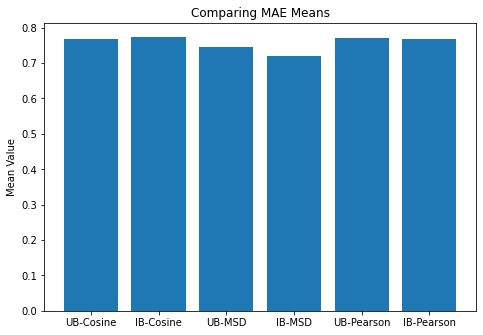

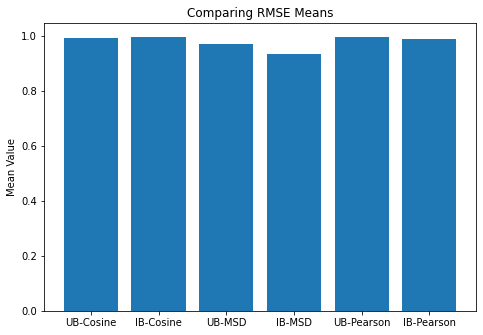

In [7]:
labels = ['UB-Cosine', 'IB-Cosine', 'UB-MSD', 'IB-MSD', 'UB-Pearson', 'IB-Pearson',]
values_MAE = [0.7670, 0.7750, 0.7441, 0.7209, 0.7719, 0.7676]
values_RMSE = [0.9925, 0.9943, 0.9683, 0.9346, 0.9966, 0.9885]

def plotBar (labels, values, name):
    title = 'Comparing {} Means'.format(name)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel('Mean Value')
    ax.set_title(title)
    ax.bar(labels, values)
    plt.show()

plotBar(labels, values_MAE, 'MAE')
plotBar(labels, values_RMSE, 'RMSE')

Results after first test:
- User-Based Collabrative Filtering using cosine:
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation. 
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7616  0.7651  0.7704  0.7694  0.7687  0.7670  0.0033  
        RMSE (testset)    0.9821  0.9890  0.9913  0.9992  1.0009  0.9925  0.0069  
        Fit time          0.30    0.31    0.31    0.31    0.32    0.31    0.00    
        Test time         0.83    0.83    0.83    0.84    0.83    0.83    0.00 
- Item-Based Collabrative Filtering using cosine:
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
             		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7720  0.7737  0.7776  0.7749  0.7769  0.7750  0.0020  
        RMSE (testset)    0.9898  0.9933  1.0000  0.9930  0.9955  0.9943  0.0034  
        Fit time          8.48    9.20    8.40    8.05    8.16    8.46    0.40    
        Test time         5.40    4.14    3.84    3.76    3.91    4.21    0.61
- User-Based Collabrative Filtering using MSD:
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7476  0.7425  0.7474  0.7427  0.7401  0.7441  0.0030  
        RMSE (testset)    0.9688  0.9671  0.9723  0.9711  0.9620  0.9683  0.0036  
        Fit time          0.11    0.13    0.12    0.11    0.11    0.12    0.01    
        Test time         2.82    0.88    0.90    0.87    0.84    1.26    0.78
- Item-Based Collabrative Filtering using MSD:
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7188  0.7165  0.7200  0.7241  0.7251  0.7209  0.0032  
        RMSE (testset)    0.9327  0.9293  0.9325  0.9420  0.9364  0.9346  0.0043  
        Fit time          2.35    2.31    2.20    2.49    2.26    2.32    0.10    
        Test time         5.76    3.85    3.82    3.89    3.90    4.24    0.76
- User-Based Collabrative Filtering using pearson:
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7652  0.7699  0.7685  0.7733  0.7826  0.7719  0.0059  
        RMSE (testset)    0.9884  0.9927  0.9908  1.0020  1.0091  0.9966  0.0078  
        Fit time          0.40    0.40    0.41    0.52    0.55    0.46    0.06    
        Test time         0.88    0.87    0.83    1.11    2.81    1.30    0.76 
- Item-Based Collabrative Filtering using pearson:
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7651  0.7721  0.7682  0.7648  0.7679  0.7676  0.0026  
        RMSE (testset)    0.9837  0.9948  0.9883  0.9864  0.9891  0.9885  0.0036  
        Fit time          11.67   11.26   11.39   11.36   11.68   11.47   0.17    
        Test time         3.99    3.81    4.40    4.08    6.04    4.46    0.81

Mean Values:
- User-Based Collabrative Filtering using cosine:
    - MAE: 0.7670
    - RMSE: 0.9925
- Item-Based Collabrative Filtering using cosine:
    - MAE: 0.7750
    - RMSE: 0.9943
- User-Based Collabrative Filtering using MSD:
    - MAE: 0.7441
    - RMSE: 0.9683
- Item-Based Collabrative Filtering using MSD:
    - MAE: 0.7209
    - RMSE: 0.9346
- User-Based Collabrative Filtering using pearson:
    - MAE: 0.7719
    - RMSE: 0.9966
- Item-Based Collabrative Filtering using pearson:
    - MAE: 0.7676
    - RMSE: 0.9885
    
Plots:
    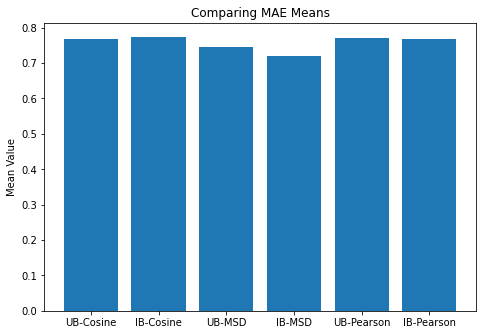
    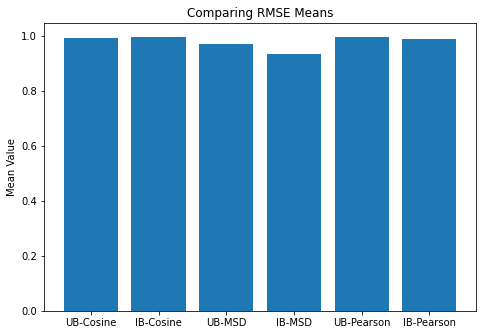
    

Based on the results of testing the different methods of calculating the similarity between data:
- User-Based: The best metric regarding both MAE and RMSE is the pearson similarity with cosine being the next best and MSD being the worst
- Item-Based the best metric regarding both MAE and RMSE is the cosine similarity with pearson being the next best and MSD being the worst

When looking at both together it is interesting to see that they didnt have the same similarity metric for their best results as user-based found its best performance with pearson while item-based found its best performance with cosine. It is also worth noting that the best model overall was user-based with pearson for MAE and item-based with cosine for RMSE.

## Part F: Compare performace from number of neighbors

In [8]:
class BasedCollabV2:
    def __init__ (self, args, data, data2, k, min_k):
        self.algo = surprise.KNNBasic(sim_options=args, k=k, min_k=min_k)
        self.data = data
        self.data2 = data2
        
    def fit (self):
        self.algo.fit(self.data)
    
    def evaluate (self):
        return cross_validate(self.algo, self.data2, measures=['MAE', 'RMSE'], cv=5, verbose=True)

k = 10
min_k = 1
    
ubc_args = {'name': 'pearson', 'user_based': True, 'verbose': False}
ubc_model = BasedCollabV2(ubc_args, trainset, dataset, k, min_k)
#ubc_model.fit()
ubc_results = ubc_model.evaluate()

ibc_args = {'name': 'cosine', 'user_based': False, 'verbose': False}
ibc_model = BasedCollabV2(ibc_args, trainset, dataset, k, min_k)
#ibc_model.fit()
ibc_results = ibc_model.evaluate()

k = 20
min_k = 10
    
ubc_args = {'name': 'pearson', 'user_based': True, 'verbose': False}
ubc_model = BasedCollabV2(ubc_args, trainset, dataset, k, min_k)
#ubc_model.fit()
ubc_results = ubc_model.evaluate()

ibc_args = {'name': 'cosine', 'user_based': False, 'verbose': False}
ibc_model = BasedCollabV2(ibc_args, trainset, dataset, k, min_k)
#ibc_model.fit()
ibc_results = ibc_model.evaluate()

k = 30
min_k = 20
    
ubc_args = {'name': 'pearson', 'user_based': True, 'verbose': False}
ubc_model = BasedCollabV2(ubc_args, trainset, dataset, k, min_k)
#ubc_model.fit()
ubc_results = ubc_model.evaluate()

ibc_args = {'name': 'cosine', 'user_based': False, 'verbose': False}
ibc_model = BasedCollabV2(ibc_args, trainset, dataset, k, min_k)
#ibc_model.fit()
ibc_results = ibc_model.evaluate()

k = 40
min_k = 30
    
ubc_args = {'name': 'pearson', 'user_based': True, 'verbose': False}
ubc_model = BasedCollabV2(ubc_args, trainset, dataset, k, min_k)
#ubc_model.fit()
ubc_results = ubc_model.evaluate()

ibc_args = {'name': 'cosine', 'user_based': False, 'verbose': False}
ibc_model = BasedCollabV2(ibc_args, trainset, dataset, k, min_k)
#ibc_model.fit()
ibc_results = ibc_model.evaluate()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7791  0.7830  0.7873  0.7869  0.7821  0.7837  0.0031  
RMSE (testset)    1.0065  1.0111  1.0138  1.0174  1.0072  1.0112  0.0041  
Fit time          0.46    0.41    0.43    0.48    0.47    0.45    0.03    
Test time         0.79    0.66    0.71    0.62    0.68    0.69    0.06    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similari

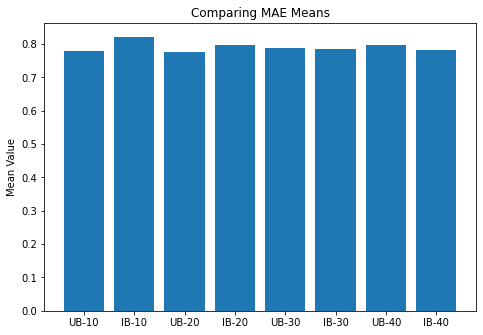

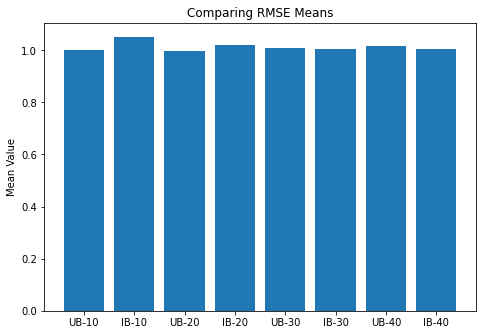

In [9]:
labels = ['UB-10', 'IB-10', 'UB-20', 'IB-20', 'UB-30', 'IB-30', 'UB-40', 'IB-40']
values_MAE = [0.7784, 0.8223, 0.7748, 0.7955, 0.7876, 0.7836, 0.7971, 0.7830]
values_RMSE = [1.0008, 1.0527, 0.9965, 1.0189, 1.0096, 1.0063, 1.0178, 1.0032]

plotBar(labels, values_MAE, 'MAE')
plotBar(labels, values_RMSE, 'RMSE')

## Part G: Compare K neighbor results and identify best

Results after first test: 
- User-Based with k = 10, min_k = 1
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7844  0.7795  0.7766  0.7791  0.7722  0.7784  0.0040  
        RMSE (testset)    1.0130  0.9998  0.9974  1.0010  0.9927  1.0008  0.0067  
        Fit time          0.40    0.40    0.40    0.40    0.40    0.40    0.00    
        Test time         0.64    0.66    2.56    0.64    0.65    1.03    0.76    
- Item-Based with k = 10, min_k = 1
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.8220  0.8195  0.8218  0.8207  0.8277  0.8223  0.0028  
        RMSE (testset)    1.0549  1.0475  1.0532  1.0524  1.0556  1.0527  0.0028  
        Fit time          8.12    8.61    7.98    7.94    8.11    8.15    0.24    
        Test time         2.91    3.02    3.01    3.09    3.11    3.03    0.07    
- User-Based with k = 20, min_k = 10
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7726  0.7682  0.7752  0.7803  0.7776  0.7748  0.0041  
        RMSE (testset)    0.9937  0.9903  0.9966  1.0039  0.9981  0.9965  0.0046  
        Fit time          0.40    0.40    0.40    0.40    0.40    0.40    0.00    
        Test time         0.74    0.75    0.75    0.75    0.74    0.75    0.01    
- Item-Based with k = 20, min_k = 10
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation. 
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7972  0.7918  0.8018  0.8007  0.7861  0.7955  0.0059  
        RMSE (testset)    1.0206  1.0155  1.0253  1.0248  1.0084  1.0189  0.0063  
        Fit time          8.04    8.02    8.21    8.29    8.27    8.16    0.12    
        Test time         3.10    3.32    3.49    5.36    3.45    3.74    0.82    
- User-Based with k = 30, min_k = 20
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7825  0.7880  0.7853  0.7951  0.7873  0.7876  0.0042  
        RMSE (testset)    1.0045  1.0084  1.0057  1.0188  1.0104  1.0096  0.0051  
        Fit time          0.40    0.43    0.43    0.45    0.52    0.45    0.04    
        Test time         0.79    0.85    0.93    2.93    1.12    1.32    0.81    
- Item-Based with k = 30, min_k = 20
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7867  0.7840  0.7777  0.7834  0.7862  0.7836  0.0032  
        RMSE (testset)    1.0086  1.0086  0.9985  1.0089  1.0071  1.0063  0.0040  
        Fit time          8.95    8.90    8.40    8.38    8.36    8.60    0.27    
        Test time         4.17    3.90    3.67    3.70    3.84    3.86    0.18    
- User-Based with k = 40, min_k = 30
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation.
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.8040  0.7987  0.7936  0.7927  0.7967  0.7971  0.0041  
        RMSE (testset)    1.0250  1.0212  1.0137  1.0117  1.0175  1.0178  0.0048  
        Fit time          0.42    0.42    0.42    0.43    0.46    0.43    0.01    
        Test time         0.87    0.91    0.95    0.95    3.15    1.36    0.90    
- Item-Based with k = 30, min_k = 20
        Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s) and include mean, std deviation. 
            		      Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean   Std. Dev
        MAE (testset)     0.7867  0.7817  0.7802  0.7836  0.7829  0.7830  0.0022  
        RMSE (testset)    1.0054  1.0021  1.0032  1.0021  1.0032  1.0032  0.0012  
        Fit time          8.31    8.42    8.23    8.37    8.22    8.31    0.08    
        Test time         3.95    4.00    3.97    3.93    5.88    4.35    0.77
    
Mean values for models:
- User-Based with k = 10, min_k = 1
    - MAE:0.7784
    - RMSE: 1.0008
- Item-Based with k = 10, min_k = 1
    - MAE:0.8223
    - RMSE: 1.0527
- User-Based with k = 20, min_k = 10
    - MAE:0.7748
    - RMSE: 0.9965
- Item-Based with k = 20, min_k = 10
    - MAE:0.7955
    - RMSE: 1.0189
- User-Based with k = 30, min_k = 20
    - MAE:0.7876
    - RMSE: 1.0096
- Item-Based with k = 30, min_k = 20
    - MAE:0.7836
    - RMSE: 1.0063
- User-Based with k = 40, min_k = 30
    - MAE:0.7971
    - RMSE: 1.0178
- Item-Based with k = 40, min_k = 30
    - MAE:0.7830
    - RMSE: 1.0032
    
Plots:
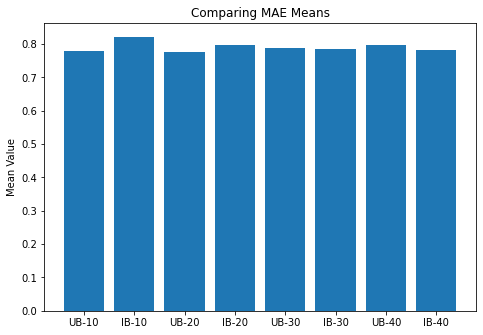
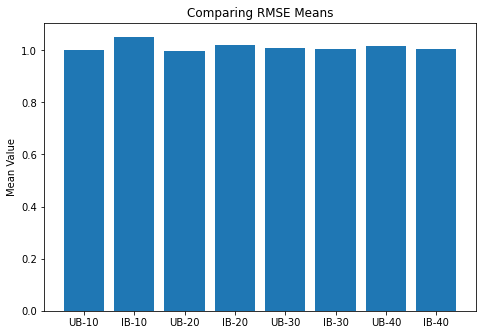

Based on the results of testing as shown above, it would seem that the best number of neighbors for user-based is between 30 and 40 while the best number of neighbors for item-based is between 1 and 10; thus the two models have very different best number of neighbors. It is worth noting that overall the best performing model during the k-neighbor testing seems to be the item-based collaborative filtering model with 1 <= k <= 10 as it had the highest overall MAE and RMSE values. 